<a href="https://colab.research.google.com/github/peisuke/ml-works/blob/main/2/2_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2.2 多項式回帰
- 目的
    - 多項式での線形回帰を行う
    - 線形基底関数モデル資料中の1次方程式・2次方程式・3次方程式に対応
- 内容
    - シミュレーションデータを対象に、直線以外の当てはめを行う
- 参考
    - 本コードは以下のサイトを参考にしました
    - https://www.haya-programming.com/entry/2019/07/14/043223

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

In [2]:
# シミュレーションデータを作成
# y = 2 + 2x + 2x^2 - 2x^3 + 乱数のデータを作成
np.random.seed(0)
x = np.linspace(-3, 3, 40)
y = 2 + 2 * x + 2 * x ** 2 - 2 * x ** 3 +\
    np.random.normal(scale=10, size=x.shape)
X = x.reshape(-1, 1)

In [3]:
print(x[:3])
print(y[:3])

[-3.         -2.84615385 -2.69230769]
[85.64052346 62.62150836 59.93030201]


In [4]:
# 多項式回帰を実施
# y = a + bx + cx^2 + dx^3としたときに、上記x,yに当てはまるa,b,c,dを求める
pf = PolynomialFeatures(degree=3, include_bias=False)
lr = LinearRegression()
pl = Pipeline([("PF", pf), ("LR", lr)])
pl.fit(X, y)

Pipeline(steps=[('PF', PolynomialFeatures(degree=3, include_bias=False)),
                ('LR', LinearRegression())])

In [5]:
# 学習に使ったXに対して推論
pred_y = pl.predict(X)

In [6]:
print(x[:3])
print(pred_y[:3])

[-3.         -2.84615385 -2.69230769]
[81.79522201 70.97896737 61.17435658]


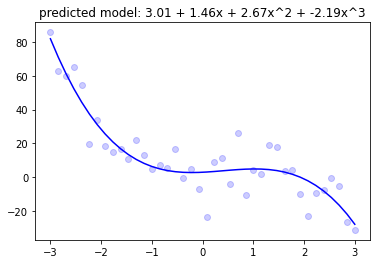

In [7]:
# 推論結果をプロット
plt.scatter(x, y, c="b", alpha=0.2)
plt.plot(x, pred_y, c="b")
plt.title(    
    "predicted model: "
    "{0:.2f} + {1:.2f}x + {2:.2f}x^2 + "
    "{3:.2f}x^3".format(
        pl.named_steps.LR.intercept_,
        *pl.named_steps.LR.coef_))
plt.show()